In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


In [41]:
train = pd.read_csv("../Data/train.csv")

In [42]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

In [6]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


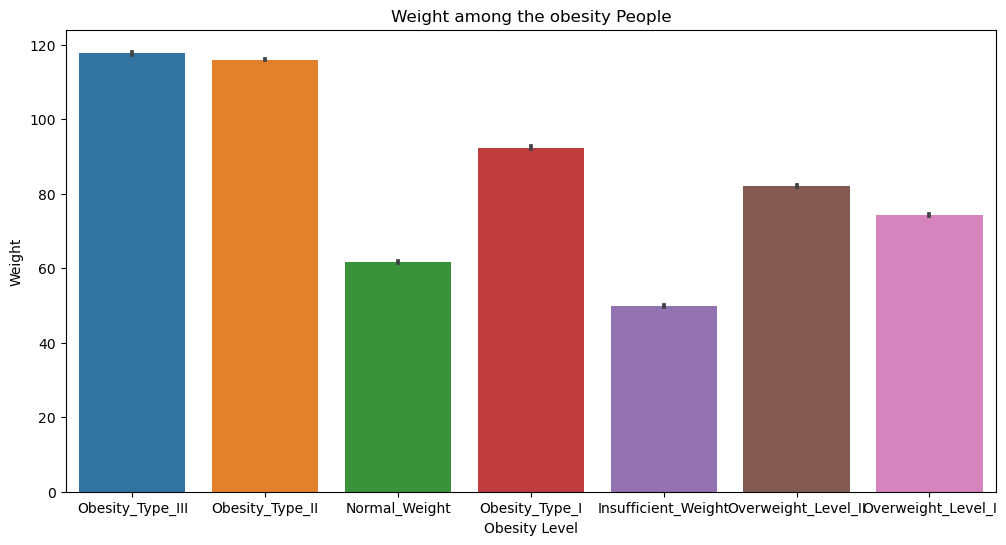

In [56]:
frequency = train['NObeyesdad'].value_counts()

order = frequency.index

plt.figure(figsize=(12, 6))
sns.barplot(x='NObeyesdad', y='Weight', data=train, order = order )
plt.title('Weight among the obesity People')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.show()

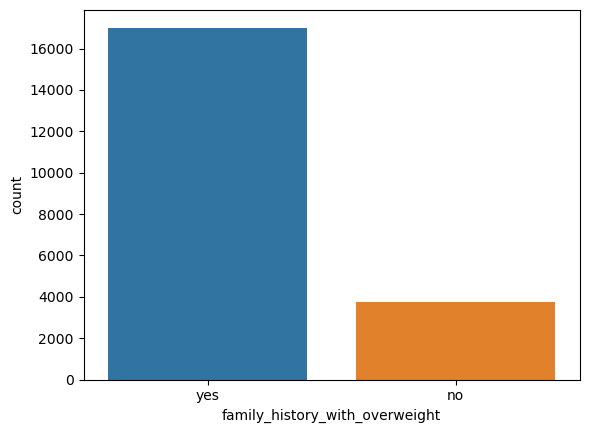

In [68]:
sns.countplot(x = 'family_history_with_overweight', data = train)
plt.show()

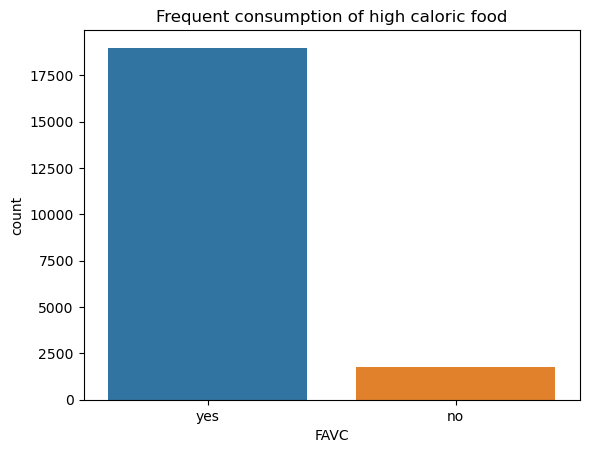

In [71]:

sns.countplot(x = 'FAVC', data = train)
plt.title('Frequent consumption of high caloric food')
plt.show()

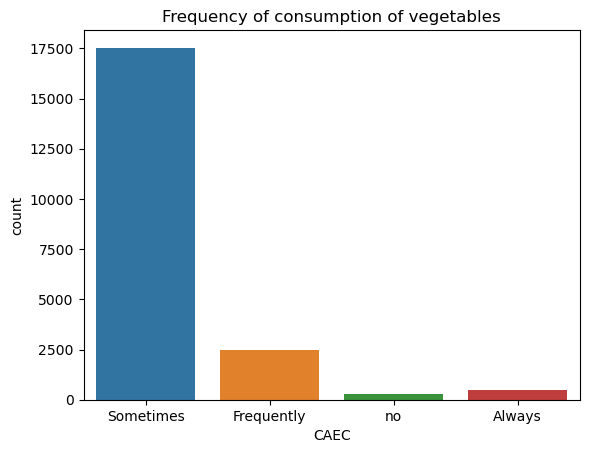

In [73]:

sns.countplot(x = 'CAEC', data = train)
plt.title('Frequency of consumption of vegetables')
plt.show()

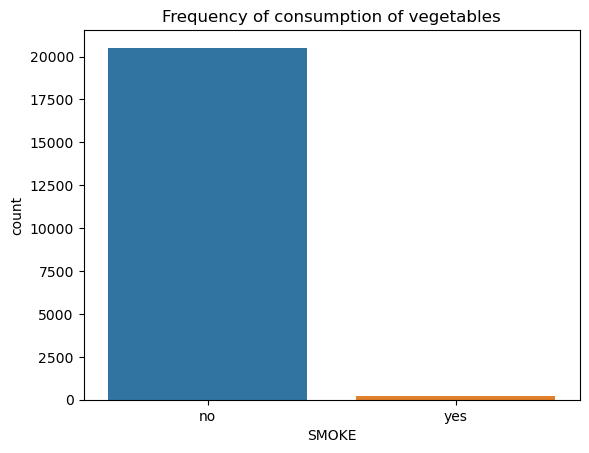

In [74]:

sns.countplot(x = 'SMOKE', data = train)
plt.title('Frequency of consumption of vegetables')
plt.show()

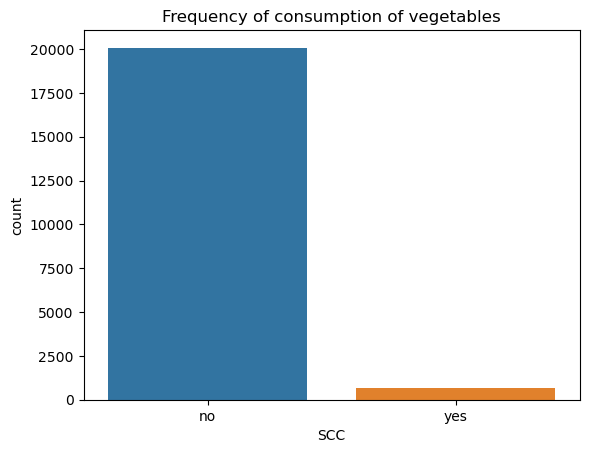

In [75]:

sns.countplot(x = 'SCC', data = train)
plt.title('Frequency of consumption of vegetables')
plt.show()

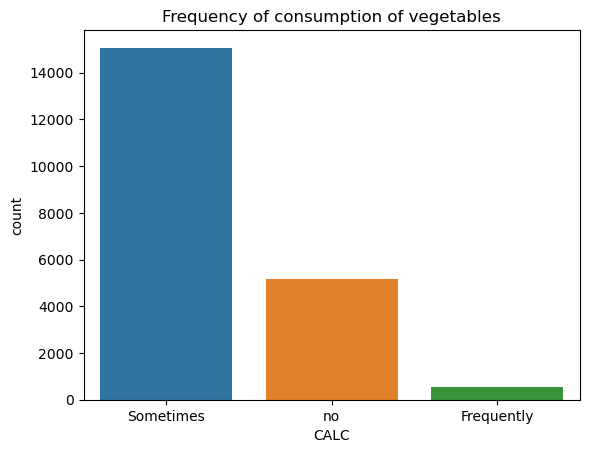

In [76]:

sns.countplot(x = 'CALC', data = train)
plt.title('Frequency of consumption of vegetables')
plt.show()

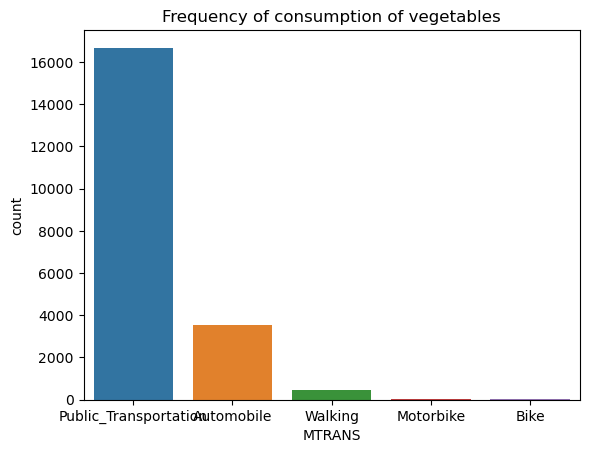

In [77]:

sns.countplot(x = 'MTRANS', data = train)
plt.title('Frequency of consumption of vegetables')
plt.show()

In [64]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
train.corr()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
id,1.000000,0.007634,0.012041,0.014020,0.002098,-0.000332,0.007917,0.016719,0.007667
Age,0.007634,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,0.012041,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.014020,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.002098,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.000332,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,0.007917,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,0.016719,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,0.007667,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


In [50]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,6
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,4
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,6


In [44]:

train= train.drop(['id'], axis = 1)

label_encoder_target = LabelEncoder()
train['NObeyesdad'] = label_encoder_target.fit_transform(train['NObeyesdad'])

In [62]:

X = train.drop(['NObeyesdad'], axis = 1)
y = train['NObeyesdad']

X= pd.get_dummies(X, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[482  40   1   0   0   1   0]
 [ 74 482   1   0   1  63   5]
 [  1   2 430  28  16   8  58]
 [  0   0  15 637   1   0   4]
 [  0   0   0   1 803   0   0]
 [  2  68  17   0   0 318  79]
 [  0  19 100   8   2  60 325]]


Accuracy of Logistic Regression: 83.74277456647398 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       524
           1       0.79      0.77      0.78       626
           2       0.76      0.79      0.78       543
           3       0.95      0.97      0.96       657
           4       0.98      1.00      0.99       804
           5       0.71      0.66      0.68       484
           6       0.69      0.63      0.66       514

    accuracy                           0.84      4152
   macro avg       0.82      0.82      0.82      4152
weighted avg       0.83      0.84      0.84      4152



In [65]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[394  18  99   0   4   3   6]
 [257 117 136  11  20  35  50]
 [  2  11 233 237   5  15  40]
 [  0   1   4 636   0   1  15]
 [  0   1   0   1 800   1   1]
 [ 49  42 119  97   2 120  55]
 [  8  25 125 190   1  16 149]]


Accuracy of Naive Bayes model: 58.983622350674366 

              precision    recall  f1-score   support

           0       0.55      0.75      0.64       524
           1       0.54      0.19      0.28       626
           2       0.33      0.43      0.37       543
           3       0.54      0.97      0.70       657
           4       0.96      1.00      0.98       804
           5       0.63      0.25      0.36       484
           6       0.47      0.29      0.36       514

    accuracy                           0.59      4152
   macro avg       0.58      0.55      0.52      4152
weighted avg       0.60      0.59      0.56      4152



In [66]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[392 111   6   0   4  11   0]
 [ 56 524   6   0   5  23  12]
 [  2   9 426  38   5   7  56]
 [  0   1  10 640   1   0   5]
 [  1   0   0   1 802   0   0]
 [  9 183  63   2   6 148  73]
 [  1  56 135   5   4  17 296]]


Accuracy of Random Forest: 77.74566473988439 

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       524
           1       0.59      0.84      0.69       626
           2       0.66      0.78      0.72       543
           3       0.93      0.97      0.95       657
           4       0.97      1.00      0.98       804
           5       0.72      0.31      0.43       484
           6       0.67      0.58      0.62       514

    accuracy                           0.78      4152
   macro avg       0.77      0.75      0.74      4152
weighted avg       0.78      0.78      0.77      4152



In [67]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[487  35   0   0   0   1   1]
 [ 43 539   2   0   0  30  12]
 [  3   8 444  27   2  12  47]
 [  0   0  11 639   2   0   5]
 [  0   0   0   1 802   1   0]
 [  3  77  12   1   0 318  73]
 [  1  26  37   9   0  23 418]]


Accuracy of Extreme Gradient Boost: 87.83718689788054 

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       524
           1       0.79      0.86      0.82       626
           2       0.88      0.82      0.85       543
           3       0.94      0.97      0.96       657
           4       1.00      1.00      1.00       804
           5       0.83      0.66      0.73       484
           6       0.75      0.81      0.78       514

    accuracy                           0.88      4152
   macro avg       0.87      0.86      0.86      4152
weighted avg       0.88      0.88      0.88      4152



In [68]:
import lightgbm as lgb

m5 = 'LightGBM'
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)
lgb_predicted = lgb_classifier.predict(X_test)
lgb_conf_matrix = confusion_matrix(y_test, lgb_predicted)
lgb_acc_score = accuracy_score(y_test, lgb_predicted)

print("Confusion matrix:")
print(lgb_conf_matrix)
print("\n")
print("Accuracy of LightGBM Classifier:", lgb_acc_score * 100, '\n')
print(classification_report(y_test, lgb_predicted))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 30
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
Confusion matrix:
[[486  35   0   0   0   2   1]
 [ 22 558   1   0   0  42   3]
 [  2   1 472  13   1  17  37]
 [  0   0  12 642   1   0   2]
 [  0   0   0   1 802   1   0]
 [  1  33  12   0   0 388  50]
 [  0   8  38   6   0  54 408]]


Accuracy of LightGBM Classifier

In [69]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[481  40   0   0   0   2   1]
 [ 45 531   0   0   0  41   9]
 [  2   0 443  16   1  11  70]
 [  0   0  21 633   2   0   1]
 [  0   0   3   1 800   0   0]
 [  1  74   8   0   0 307  94]
 [  0  11  35   6   0  72 390]]


Accuracy of DecisionTreeClassifier: 86.34393063583815 

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       524
           1       0.81      0.85      0.83       626
           2       0.87      0.82      0.84       543
           3       0.96      0.96      0.96       657
           4       1.00      1.00      1.00       804
           5       0.71      0.63      0.67       484
           6       0.69      0.76      0.72       514

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152



In [70]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[460  62   0   0   0   1   1]
 [135 394   0   0   0  80  17]
 [  2   1 327  25   2   4 182]
 [  0   0  48 605   1   0   3]
 [  0   0   1   1 801   0   1]
 [  1  92   9   0   0 223 159]
 [  0  35  77   5   0  21 376]]


Accuracy of Support Vector Classifier: 76.73410404624278 

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       524
           1       0.67      0.63      0.65       626
           2       0.71      0.60      0.65       543
           3       0.95      0.92      0.94       657
           4       1.00      1.00      1.00       804
           5       0.68      0.46      0.55       484
           6       0.51      0.73      0.60       514

    accuracy                           0.77      4152
   macro avg       0.76      0.75      0.74      4152
weighted avg       0.78      0.77      0.77      4152



In [83]:
gbdt = GradientBoostingClassifier(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150,200,300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the individual base learners
}

In [80]:
m8 = 'Gradient Boosting Decision Trees (GBDT)'

gbdt = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
gbdt.fit(X_train, y_train)
gbdt_pred = gbdt.predict(X_test)
gbdt_conf_matrix = confusion_matrix(y_test, gbdt_pred)
gbdt_acc_score = accuracy_score(y_test, gbdt_pred)
print("Confusion Matrix for Gradient Boosting Decision Trees (GBDT):")
print(gbdt_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Decision Trees (GBDT):", gbdt_acc_score * 100, '\n')
print("Classification Report for Gradient Boosting Decision Trees (GBDT):")
print(classification_report(y_test, gbdt_pred))

Confusion Matrix for Gradient Boosting Decision Trees (GBDT):
[[494  27   0   0   0   2   1]
 [ 21 560   0   0   0  37   8]
 [  2   1 475   9   1  16  39]
 [  0   0  14 639   1   0   3]
 [  0   0   1   1 802   0   0]
 [  1  33  12   0   0 381  57]
 [  0   8  37   4   0  53 412]]


Accuracy of Gradient Boosting Decision Trees (GBDT): 90.63102119460501 

Classification Report for Gradient Boosting Decision Trees (GBDT):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       524
           1       0.89      0.89      0.89       626
           2       0.88      0.87      0.88       543
           3       0.98      0.97      0.98       657
           4       1.00      1.00      1.00       804
           5       0.78      0.79      0.78       484
           6       0.79      0.80      0.80       514

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91   

In [ ]:
# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_gbdt = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

In [81]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'Light GBM','Decision Tree','Support Vector Machine','Gradient Boosting Decision Trees (GBDT)'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,lgb_acc_score*100,dt_acc_score*100,svc_acc_score*100,gbdt_acc_score * 100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.742775
1,Naive Bayes,58.983622
2,Random Forest,77.745665
3,Extreme Gradient Boost,87.837187
4,Light GBM,90.462428
5,Decision Tree,86.343931
6,Support Vector Machine,76.734104
7,Gradient Boosting Decision Trees (GBDT),90.631021


In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the improved model
improved_model = Sequential([
    Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.5),           # Add dropout layer
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and reduce learning rate on plateau
improved_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Implement learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with the improved architecture and callbacks
improved_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])

# Evaluate the improved model
test_loss, test_acc = improved_model.evaluate(X_test, y_test)
print('Test accuracy (improved model):', test_acc)
